## LinearSVC(MNIST)

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [2]:
# Load data from https://www.openml.org/d/554
mnist = fetch_openml('mnist_784', version=1) 

In [3]:
#images
print(mnist.data.shape)

#labels
print(mnist.target.shape)

(70000, 784)
(70000,)


## Splitting Data into Training and Test Sets

Training set size 60,000 images.
Test set size of 10,000.

In [4]:
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

### Showing the Images and Labels (MNIST)

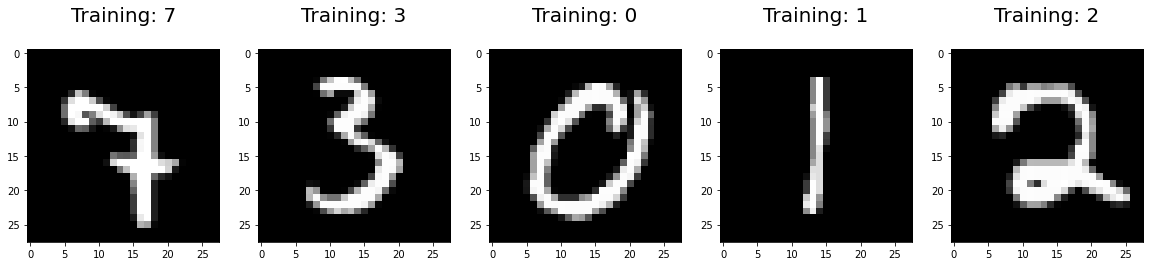

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

## Traning the model

In [6]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
svm = LinearSVC()
svm.fit(train_img, train_lbl)

/Users/saviaga/Documents/machine2/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [7]:
#Predict the labels of new data (new images)
# Returns a NumPy Array
# Predict for One Observation (image)
svm.predict(test_img[0].reshape(1,-1))

#Predict for Multiple Observations (images) at Once
svm.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '4', '7', '1', '1', '7'], dtype=object)

In [8]:
#Make predictions on entire test data
predictions = svm.predict(test_img)

## Measuring Model Performance
While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going to keep this simple and use accuracy as our metric.
To do this are going to see how the model performs on the new data (test set)
accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points

In [9]:
score = svm.score(test_img, test_lbl)
print(score)

0.849


## Confusion Matrix

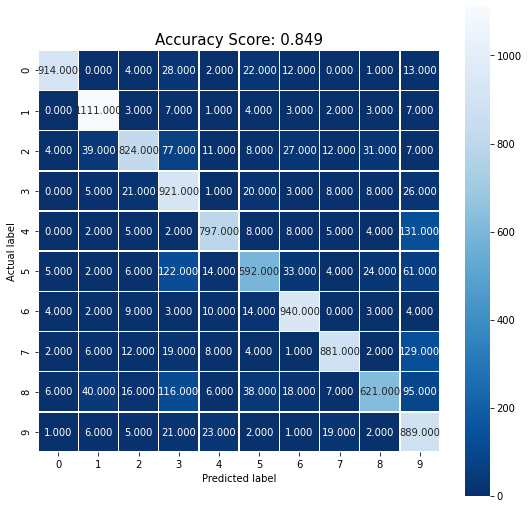

In [10]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_lbl, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Display Misclassified images with Predicted Labels 

In [11]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    #print(label,predict)
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

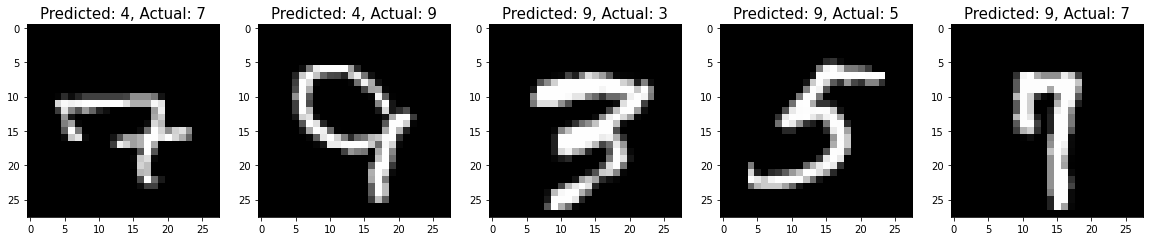

In [12]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)